# Obliczanie cech

In [17]:
import os
import csv

folder_path = 'train'  # <- podaj swoją ścieżkę do folderu z plikami
csv_file_path = 'cechy_wynik.csv'  # <- podaj ścieżkę do pliku CSV
val_folder_path = 'val'
val_csv_file_path = 'cechy_val.csv'

file_names = [f.replace('.nii.gz', '') for f in os.listdir(folder_path) if f.endswith('.nii.gz')]
val_file_names = [f.replace('.nii.gz', '') for f in os.listdir(val_folder_path) if f.endswith('.nii.gz')]

with open(csv_file_path, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['nazwa'])
    for name in file_names:
        writer.writerow([name])

with open(val_csv_file_path, mode='w', newline='') as val_csv_file:
    writer = csv.writer(val_csv_file)
    writer.writerow(['nazwa'])
    for name in val_file_names:
        writer.writerow([name])


### Pole serca

In [ ]:
import pandas as pd
import nibabel as nib
import numpy as np
import os

def heart_area(csv_path, nii_folder, new_column_name='Pole serca (px)'):
    df = pd.read_csv(csv_path)
    
    heart_pixel_counts = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                nii_img = nib.load(path)
                data = nii_img.get_fdata()

                heart_value = np.max(data)
                heart_pixels = int(np.sum(data == heart_value))

                heart_pixel_counts[base_name] = heart_pixels
            except Exception as e:
                print(f"Błąd w pliku {filename}: {e}")

    df[new_column_name] = df['nazwa'].map(heart_pixel_counts)

    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik: {csv_path}")

heart_area(csv_file_path, folder_path)
heart_area(val_csv_file_path, val_folder_path)

Zaktualizowano plik: cechy_wynik.csv
Zaktualizowano plik: cechy_val.csv


### Obwód serca

In [19]:
import cv2

def heart_parimeter(csv_path, nii_folder, column_name='Obwód serca (px)'):
    df = pd.read_csv(csv_path)

    perimeter_results = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            filepath = os.path.join(nii_folder, filename)

            try:
                nii_img = nib.load(filepath)
                data = nii_img.get_fdata()

                total_perimeter = 0.0
                heart_value = np.max(data)

                for i in range(data.shape[2]):
                    slice_2d = data[:, :, i]
                    binary = np.uint8((slice_2d == heart_value) * 255)
                    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    for cnt in contours:
                        total_perimeter += cv2.arcLength(cnt, True)

                perimeter_results[base_name] = total_perimeter
            except Exception as e:
                print(f"Błąd przy pliku {filename}: {e}")

    df[column_name] = df['nazwa'].map(perimeter_results)

    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik")

heart_parimeter(csv_file_path, folder_path)
heart_parimeter(val_csv_file_path,val_folder_path)


Zaktualizowano plik
Zaktualizowano plik


### Pole płuc

In [ ]:
def lung_area(csv_path, nii_folder):
    df = pd.read_csv(csv_path)
    lung_areas = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                data = nib.load(path).get_fdata()
                pixels = int(np.sum(data == 1))  # 1 = płuca
                lung_areas[name] = pixels
            except Exception as e:
                print(f"Błąd: {name} - {e}")

    df['Pole płuc (px)'] = df['nazwa'].map(lung_areas)
    df.to_csv(csv_path, index=False)
    print("Zaktualizowano plik:", csv_path)

lung_area(csv_file_path, folder_path)
lung_area(val_csv_file_path,val_folder_path)

Zaktualizowano plik: cechy_wynik.csv
Zaktualizowano plik: cechy_val.csv


### Wysokość serca

In [21]:
def heart_height(csv_path, nii_folder, new_column_name='Wysokość serca (px)'):
    df = pd.read_csv(csv_path)

    heart_heights = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                nii_img = nib.load(path)
                data = nii_img.get_fdata()

                heart_value = np.max(data)
                heart_mask = (data == heart_value)

                # Zostawiamy oś Y, sumujemy po X i Z
                projection = np.any(heart_mask, axis=(0, 2))
                height = int(np.sum(projection))  # ile wierszy zawiera serce

                heart_heights[base_name] = height

            except Exception as e:
                print(f"Błąd w pliku {filename}: {e}")

    df[new_column_name] = df['nazwa'].map(heart_heights)

    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik: {csv_path}")


heart_height(csv_file_path, folder_path)
heart_height(val_csv_file_path,val_folder_path)

Zaktualizowano plik: cechy_wynik.csv
Zaktualizowano plik: cechy_val.csv


### Szerokość serca

In [22]:
def heart_width(csv_path, nii_folder, new_column_name='Szerokość serca (px)'):
    df = pd.read_csv(csv_path)

    heart_widths = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                nii_img = nib.load(path)
                data = nii_img.get_fdata()

                heart_value = np.max(data)
                heart_mask = (data == heart_value)

                projection = np.any(heart_mask, axis=(1, 2))
                width = int(np.sum(projection))

                heart_widths[base_name] = width

            except Exception as e:
                print(f"Błąd w pliku {filename}: {e}")

    df[new_column_name] = df['nazwa'].map(heart_widths)

    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik: {csv_path}")

heart_width(csv_file_path, folder_path)
heart_width(val_csv_file_path,val_folder_path)

Zaktualizowano plik: cechy_wynik.csv
Zaktualizowano plik: cechy_val.csv


### Wysokość całe

In [23]:
def segment_height(csv_path, nii_folder, new_column_name='Wysokość całe (px)'):
    df = pd.read_csv(csv_path)

    heights = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                data = nib.load(path).get_fdata()
                mask = (data != 0)
                projection = np.any(mask, axis=(0, 2))
                height = int(np.sum(projection))

                heights[base_name] = height

            except Exception as e:
                print(f"Błąd w pliku {filename}: {e}")

    df[new_column_name] = df['nazwa'].map(heights)

    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik: {csv_path}")

segment_height(csv_file_path, folder_path)
segment_height(val_csv_file_path,val_folder_path)

Zaktualizowano plik: cechy_wynik.csv
Zaktualizowano plik: cechy_val.csv


### Szerokość całe

In [24]:
def segment_width(csv_path, nii_folder, new_column_name='Szerokość całe (px)'):
    df = pd.read_csv(csv_path)

    widths = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                data = nib.load(path).get_fdata()

                mask = (data != 0)
                projection = np.any(mask, axis=(1, 2))
                width = int(np.sum(projection))

                widths[base_name] = width

            except Exception as e:
                print(f"Błąd w pliku {filename}: {e}")

    df[new_column_name] = df['nazwa'].map(widths)

    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik: {csv_path}")

segment_width(csv_file_path, folder_path)
segment_width(val_csv_file_path,val_folder_path)


Zaktualizowano plik: cechy_wynik.csv
Zaktualizowano plik: cechy_val.csv


### CTAR

In [25]:
def add_heart_lung_ratio(csv_path, new_column_name='CTAR'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['Pole serca (px)'] / df['Pole płuc (px)']

    df.to_csv(csv_path, index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_heart_lung_ratio(csv_file_path)
add_heart_lung_ratio(val_csv_file_path)


Dodano kolumnę 'CTAR' do pliku cechy_wynik.csv
Dodano kolumnę 'CTAR' do pliku cechy_val.csv


### CTR

In [26]:
def add_heart_width_segment_width_ratio(csv_path, new_column_name='CTR'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['Szerokość serca (px)'] / df['Szerokość całe (px)']

    df.to_csv(csv_path, index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_heart_width_segment_width_ratio(csv_file_path)
add_heart_width_segment_width_ratio(val_csv_file_path)

Dodano kolumnę 'CTR' do pliku cechy_wynik.csv
Dodano kolumnę 'CTR' do pliku cechy_val.csv


### Aspect Ratio

In [27]:
def add_aspect_ratio(csv_path, new_column_name='Aspect Ratio'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['Wysokość serca (px)'] / df['Wysokość całe (px)']

    df.to_csv(csv_path, index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_aspect_ratio(csv_file_path)
add_aspect_ratio(val_csv_file_path)

Dodano kolumnę 'Aspect Ratio' do pliku cechy_wynik.csv
Dodano kolumnę 'Aspect Ratio' do pliku cechy_val.csv


### Odwrotne Aspect Ratio

In [28]:
def add_inverted_aspect_ratio(csv_path, new_column_name='Odwrotne Aspect Ratio'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['Wysokość całe (px)'] / df['Wysokość serca (px)']

    df.to_csv(csv_path, index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_inverted_aspect_ratio(csv_file_path)
add_inverted_aspect_ratio(val_csv_file_path)

Dodano kolumnę 'Odwrotne Aspect Ratio' do pliku cechy_wynik.csv
Dodano kolumnę 'Odwrotne Aspect Ratio' do pliku cechy_val.csv


### Common Sum

In [29]:
def add_common_sum(csv_path, new_column_name='Common Sum'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['Odwrotne Aspect Ratio'] + df['CTR'] + df['CTAR']

    df.to_csv(csv_path, index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_common_sum(csv_file_path)
add_common_sum(val_csv_file_path)

Dodano kolumnę 'Common Sum' do pliku cechy_wynik.csv
Dodano kolumnę 'Common Sum' do pliku cechy_val.csv


### CTR4

In [30]:
def add_ctr_with_heart_width(csv_path, new_column_name='CTR4'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['CTR'] + df['Szerokość serca (px)']

    df.to_csv(csv_path,index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_ctr_with_heart_width(csv_file_path)
add_ctr_with_heart_width(val_csv_file_path)

Dodano kolumnę 'CTR4' do pliku cechy_wynik.csv
Dodano kolumnę 'CTR4' do pliku cechy_val.csv


### CTR1

In [31]:
def add_ctr_with_heart_area(csv_path, new_column_name='CTR + Heart Area'):
    df = pd.read_csv(csv_path)

    df[new_column_name] = df['CTR'] + df['Pole płuc (px)']

    df.to_csv(csv_path,index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_ctr_with_heart_area(csv_file_path)
add_ctr_with_heart_area(val_csv_file_path)

Dodano kolumnę 'CTR + Heart Area' do pliku cechy_wynik.csv
Dodano kolumnę 'CTR + Heart Area' do pliku cechy_val.csv


### Pole Okręgu Wpisanego i Promień Okręgu

In [32]:
from scipy.ndimage import distance_transform_edt

def add_heart_area(csv_path,nii_folder,new_column_name='pole koła wpisanego'):
    df = pd.read_csv(csv_path)

    heart_areas = {}
    heart_radiuses = {}

    for filename in os.listdir(nii_folder):
        if filename.endswith(".nii.gz"):
            base_name = filename.replace(".nii.gz", "")
            path = os.path.join(nii_folder, filename)

            try:
                nii_img = nib.load(path)
                data = nii_img.get_fdata()

                heart_value = np.max(data)
                heart_mask = (data == heart_value)

                heart_area,heart_radius = analyze_heart_center(heart_mask)

                heart_areas[base_name] = heart_area
                heart_radiuses[base_name] = heart_radius

            except Exception as e:
                print(f"Błąd w pliku {filename}: {e}")

    df[new_column_name] = df['nazwa'].map(heart_areas)
    df['promień koła wpisanego'] = df['nazwa'].map(heart_radiuses)

    df.to_csv(csv_path,index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

def analyze_heart_center(mask):
    #heart_mask = (mask == 255).astype(np.uint8)
    lung_mask = (mask == 128).astype(np.uint8)

    dist_transform = distance_transform_edt(mask)
    max_dist = np.max(dist_transform)

    # Obliczenia dla okręgu wpisanego
    inscribed_radius = max_dist
    inscribed_area = np.pi * (inscribed_radius ** 2)

    return inscribed_area, inscribed_radius

add_heart_area(csv_file_path,folder_path)
add_heart_area(val_csv_file_path, val_folder_path)

Dodano kolumnę 'pole koła wpisanego' do pliku cechy_wynik.csv
Dodano kolumnę 'pole koła wpisanego' do pliku cechy_val.csv


### Zaokragelenie koniuszka

In [33]:
import cv2
import numpy as np
from scipy.optimize import leastsq
import os
import pandas as pd
import nibabel as nib

# Funkcja błędu do dopasowania okręgu metodą najmniejszych kwadratów
def fit_circle(params, x, y):
    xc, yc, r = params
    return np.sqrt((x - xc)**2 + (y - yc)**2) - r

# Główna funkcja: dodaje kolumnę z promieniem koniuszka na podstawie danych z obrazów .nii.gz
def add_radius_column(csv_path, nii_folder, new_column_name='Promień koniuszka (px)', region_radius=15, slice_index=None):
    # Wczytaj plik CSV jako DataFrame
    df = pd.read_csv(csv_path)
    
    # Słownik na promienie, indeksowane nazwami plików (bez rozszerzenia)
    radii = {}

    # Iteracja po wszystkich plikach w folderze
    for filename in os.listdir(nii_folder):
        if not filename.lower().endswith('.nii.gz'):
            continue  # Pomijamy pliki inne niż .nii.gz

        nii_path = os.path.join(nii_folder, filename)
        try:
            # Wczytaj dane z pliku .nii.gz
            nii_img = nib.load(nii_path)
            img_data = nii_img.get_fdata()
        except Exception as e:
            print(f"Błąd ładowania {filename}: {e}")
            continue

        # Wybór przekroju w osi Z (domyślnie środkowy)
        z = slice_index if slice_index is not None else img_data.shape[2] // 2
        slice_2d = img_data[:, :, z]

        # Normalizacja wartości do zakresu 0–255 i konwersja do uint8 (potrzebna dla OpenCV)
        slice_norm = (slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d))
        slice_uint8 = (slice_norm * 255).astype(np.uint8)

        # Binarizacja obrazu — tylko wartości powyżej 200 pozostają jako 255 (biały)
        _, binary = cv2.threshold(slice_uint8, 200, 255, cv2.THRESH_BINARY)

        # Znajdź kontury w obrazie binarnym
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        if not contours:
            continue  # Jeśli brak konturów, przechodzimy do następnego pliku

        # Wybierz największy kontur (np. najbardziej zewnętrzny)
        cnt = max(contours, key=cv2.contourArea)
        cnt_points = cnt[:, 0, :]  # Usunięcie zbędnego wymiaru

        # Znajdź punkt w dolnym prawym rogu (suma współrzędnych x+y największa)
        bottom_right = max(cnt_points, key=lambda p: (p[0] + p[1]))

        # Oblicz dystans każdego punktu konturu od punktu bottom_right
        distances = np.linalg.norm(cnt_points - bottom_right, axis=1)

        # Wybierz punkty w zadanym promieniu (region koniuszka)
        region_mask = distances < region_radius
        region_points = cnt_points[region_mask]

        if len(region_points) < 3:
            continue  # Potrzebujemy co najmniej 3 punktów do dopasowania okręgu

        # Przygotuj współrzędne punktów do dopasowania
        x = region_points[:, 0]
        y = region_points[:, 1]
        x_m, y_m = np.mean(x), np.mean(y)  # Środek masy jako wstępne przybliżenie środka okręgu
        initial_guess = (x_m, y_m, 10)     # Startowe wartości: (x, y, promień)

        try:
            # Dopasuj okrąg metodą najmniejszych kwadratów
            result, _ = leastsq(fit_circle, initial_guess, args=(x, y))
            _, _, radius = result  # Interesuje nas tylko promień

            # Usuń rozszerzenie pliku .nii.gz → zapisujemy tylko nazwę
            base_name = os.path.splitext(os.path.splitext(filename)[0])[0]
            radii[base_name] = round(radius, 2)  # Zaokrąglamy promień i zapisujemy
        except Exception as e:
            print(f"Błąd w pliku {filename}: {e}")

    # Dopasowanie nazw: usuń rozszerzenia z kolumny 'nazwa' w CSV, żeby dopasować do radii
    df['nazwa_bez_rozszerzenia'] = df['nazwa'].apply(lambda x: os.path.splitext(os.path.splitext(x)[0])[0])
    df[new_column_name] = df['nazwa_bez_rozszerzenia'].map(radii)  # Dodaj nową kolumnę z promieniami
    df.drop(columns='nazwa_bez_rozszerzenia', inplace=True)  # Usuń tymczasową kolumnę

    # Zapisz zaktualizowany CSV
    df.to_csv(csv_path, index=False)
    print(f"Zaktualizowano plik CSV: {csv_path}")

add_radius_column(val_csv_file_path, val_folder_path)
add_radius_column(csv_file_path, folder_path)

Zaktualizowano plik CSV: cechy_val.csv
Zaktualizowano plik CSV: cechy_wynik.csv


### Występowanie Kardiomegalii

In [34]:
def add_cardiomegally(csv_path,folder_path,new_column_name="Kardiomegalia"):
    df = pd.read_csv(csv_path)
    labels = pd.read_csv(f'{folder_path}/labelki.csv')

    label_dict = dict(zip(labels['ID'], labels['Ground truth nieindeksowane']))

    df[new_column_name] = df['nazwa'].str.extract(r'^(\d+)').astype(int)[0].map(label_dict)

    df.to_csv(csv_path,index=False)
    print(f"Dodano kolumnę '{new_column_name}' do pliku {csv_path}")

add_cardiomegally(csv_file_path,folder_path)
add_cardiomegally(val_csv_file_path,val_folder_path)

Dodano kolumnę 'Kardiomegalia' do pliku cechy_wynik.csv
Dodano kolumnę 'Kardiomegalia' do pliku cechy_val.csv


# Trening Modelu

### Importy

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

### Przygotowanie Danych

In [ ]:
df = pd.read_csv(csv_file_path)
dv = pd.read_csv(val_csv_file_path)
df.rename(columns={
    'Obwód Serca (px)': 'Obwod serca',
    'CTAR - Cardiothoracic Area Ratio (stosunek pól serca serca do płuc)': 'CTAR',
    'CTR - Cardiothoracic Ratio (szerokosc serca/szerokosc pluc, >0,5 = kardiomegalia)': 'CTR',
    'odwrotne Aspect Ratio of the Heart (szerokosc/wysokosc serca)': 'ARH',
    'CTR + Heart Area': 'CTR1',
    'CTR + odwrotne Aspect Ratio ': 'CTR2',
    'CTR + obwód serca': 'CTR3',
    'CTR + szerokość serca': 'CTR4',
    'pole prostokąta zawierającego serce': 'Obwod prostokata',
    'stosunek pola serca do pola prostokata opisanego': 'Stsunuek pol okregu i prostokata',
    'stosunek pola serca na prawo i lewo od okregu wpisanego': 'Stsunuek pol okregu',
    'CTR + wysokość serca': 'CTR5',
    'promień koła wpisanego': 'promien kola',
    'Promień koniuszka (px)': 'koniuszek',
    'pole koła wpisanego': 'pole kola'
}, inplace=True)

dv.rename(columns={
    'Obwód Serca (px)': 'Obwod serca',
    'CTAR - Cardiothoracic Area Ratio (stosunek pól serca serca do płuc)': 'CTAR',
    'CTR - Cardiothoracic Ratio (szerokosc serca/szerokosc pluc, >0,5 = kardiomegalia)': 'CTR',
    'odwrotne Aspect Ratio of the Heart (szerokosc/wysokosc serca)': 'ARH',
    'CTR + Heart Area': 'CTR1',
    'CTR + odwrotne Aspect Ratio ': 'CTR2',
    'CTR + obwód serca': 'CTR3',
    'CTR + szerokość serca': 'CTR4',
    'pole prostokąta zawierającego serce': 'Obwod prostokata',
    'stosunek pola serca do pola prostokata opisanego': 'Stsunuek pol okregu i prostokata',
    'stosunek pola serca na prawo i lewo od okregu wpisanego': 'Stsunuek pol okregu',
    'CTR + wysokość serca': 'CTR5',
    'promień koła wpisanego': 'promien kola',
    'Promień koniuszka (px)': 'koniuszek',
    'pole koła wpisanego': 'pole kola'
}, inplace=True)

X_train = df[['CTR4', 'Common Sum', 'koniuszek', 'promien kola']]
y_train = df['Kardiomegalia']

# Przygotowanie danych walidacyjnych
X_val = dv[['CTR4', 'Common Sum', 'koniuszek', 'promien kola']]
y_val = dv['Kardiomegalia']

# Skalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Model 1

In [37]:

# ensemble training
clf_knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
clf_tree = DecisionTreeClassifier(max_depth=3, criterion='gini', min_samples_split=2, class_weight='balanced')
clf_svc = SVC(kernel='rbf', C=5, gamma='scale', probability=True, class_weight='balanced')
clf_log = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=1000, class_weight='balanced')
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=6, n_estimators=100, class_weight='balanced')
clf_gpc = GaussianProcessClassifier(max_iter_predict=100, kernel= 1**2 * RBF(length_scale=0.1))
clf_gnb = GaussianNB(var_smoothing= 1e-09)

ensemble = VotingClassifier(
    estimators=[
    ('knn', clf_knn),
    ('svc', clf_svc),
    #('rf', clf_rf),
    #('tree', clf_tree), #pogarsza
    #('gpc', clf_gpc), #pogarsza
    #('gnb', clf_gnb), #pogarsza
    #('log', clf_log) #pogarsza
], voting='soft')

# Trening
ensemble.fit(X_train_scaled, y_train)

# Predykcja
y_pred = ensemble.predict(X_val_scaled)

# Wyświetlenie predykcji
dv['Predicted'] = y_pred
print(dv[['nazwa', 'Predicted']])

# (Opcjonalnie) ewaluacja, jeśli prawdziwe etykiety są obecne
if 'Kardiomegalia' in dv.columns and dv['Kardiomegalia'].notna().all():
    print(classification_report(dv['Kardiomegalia'], y_pred))

   nazwa  Predicted
0   16CE          1
1  19ChM          1
2   23RM          1
3   33SP          1
4   34ZA          0
5   36SB          1
6   44MM          1
7    4MP          1
8   51KG          1
9    6PJ          1
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.78      1.00      0.88         7

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



In [47]:
df = pd.read_csv(csv_file_path)
dv = pd.read_csv(val_csv_file_path)
df.rename(columns={
    'Obwód Serca (px)': 'Obwod serca',
    'CTAR - Cardiothoracic Area Ratio (stosunek pól serca serca do płuc)': 'CTAR',
    'CTR - Cardiothoracic Ratio (szerokosc serca/szerokosc pluc, >0,5 = kardiomegalia)': 'CTR',
    'odwrotne Aspect Ratio of the Heart (szerokosc/wysokosc serca)': 'ARH',
    'CTR + Heart Area': 'CTR1',
    'CTR + odwrotne Aspect Ratio ': 'CTR2',
    'CTR + obwód serca': 'CTR3',
    'CTR + szerokość serca': 'CTR4',
    'pole prostokąta zawierającego serce': 'Obwod prostokata',
    'stosunek pola serca do pola prostokata opisanego': 'Stsunuek pol okregu i prostokata',
    'stosunek pola serca na prawo i lewo od okregu wpisanego': 'Stsunuek pol okregu',
    'CTR + wysokość serca': 'CTR5',
    'promień koła wpisanego': 'promien kola',
    'Promień koniuszka (px)': 'koniuszek',
    'pole koła wpisanego': 'pole kola'
}, inplace=True)

dv.rename(columns={
    'Obwód Serca (px)': 'Obwod serca',
    'CTAR - Cardiothoracic Area Ratio (stosunek pól serca serca do płuc)': 'CTAR',
    'CTR - Cardiothoracic Ratio (szerokosc serca/szerokosc pluc, >0,5 = kardiomegalia)': 'CTR',
    'odwrotne Aspect Ratio of the Heart (szerokosc/wysokosc serca)': 'ARH',
    'CTR + Heart Area': 'CTR1',
    'CTR + odwrotne Aspect Ratio ': 'CTR2',
    'CTR + obwód serca': 'CTR3',
    'CTR + szerokość serca': 'CTR4',
    'pole prostokąta zawierającego serce': 'Obwod prostokata',
    'stosunek pola serca do pola prostokata opisanego': 'Stsunuek pol okregu i prostokata',
    'stosunek pola serca na prawo i lewo od okregu wpisanego': 'Stsunuek pol okregu',
    'CTR + wysokość serca': 'CTR5',
    'promień koła wpisanego': 'promien kola',
    'Promień koniuszka (px)': 'koniuszek',
    'pole koła wpisanego': 'pole kola'
}, inplace=True)

X_train = df[['CTR4', 'CTR1', 'koniuszek', 'pole kola']]
y_train = df['Kardiomegalia']

# Przygotowanie danych walidacyjnych
X_val = dv[['CTR4', 'CTR1', 'koniuszek', 'pole kola']]
y_val = dv['Kardiomegalia']

# Skalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [39]:
### Model 2

In [48]:

# ensemble training
clf_knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
clf_tree = DecisionTreeClassifier(max_depth=3, criterion='gini', min_samples_split=2, class_weight='balanced')
clf_svc = SVC(kernel='rbf', C=5, gamma='scale', probability=True, class_weight='balanced')
clf_log = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=1000, class_weight='balanced')
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=5, n_estimators=20, class_weight='balanced')
clf_gpc = GaussianProcessClassifier(max_iter_predict=100, kernel= 1**2 * RBF(length_scale=0.1))
clf_gnb = GaussianNB(var_smoothing= 1e-09)

ensemble = VotingClassifier(
    estimators=[
    ('knn', clf_knn),
    ('svc', clf_svc),
    ('rf', clf_rf),
    #('tree', clf_tree), #pogarsza
    #('gpc', clf_gpc), #pogarsza
    #('gnb', clf_gnb), #pogarsza
    #('log', clf_log) #pogarsza
], voting='soft')

# Trening
ensemble.fit(X_train_scaled, y_train)

# Predykcja
y_pred = ensemble.predict(X_val_scaled)

# Wyświetlenie predykcji
dv['Predicted'] = y_pred
print(dv[['nazwa', 'Predicted']])

# (Opcjonalnie) ewaluacja, jeśli prawdziwe etykiety są obecne
if 'Kardiomegalia' in dv.columns and dv['Kardiomegalia'].notna().all():
    print(classification_report(dv['Kardiomegalia'], y_pred))

   nazwa  Predicted
0   16CE          1
1  19ChM          1
2   23RM          1
3   33SP          1
4   34ZA          0
5   36SB          1
6   44MM          1
7    4MP          1
8   51KG          1
9    6PJ          1
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.78      1.00      0.88         7

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



### Ocena Modelu

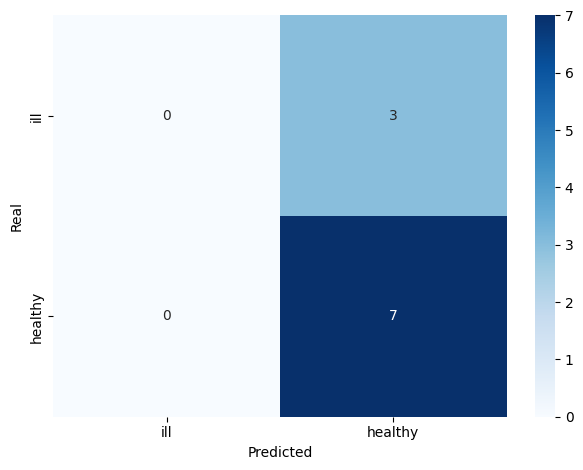


False Positives (FP): 3
False Negatives (FN): 0
Stratified 5-Fold CV Accuracy: 0.7000
Confusion Matrix:
[[0 3]
 [0 7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



c:\Users\domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [41]:
import seaborn as sns

# Metryki
acc = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = cm.ravel()

labels = ['ill','healthy']
plt.figure()
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=labels,yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print(f"\nFalse Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Stratified 5-Fold CV Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))